## Decision Tree Intuition - End result looks like a step/ladder chart
When would you use this? - This model is better used when you have more/multiple dimensions. In this case, we used a 1D (basically only one independent variable), so it's not that strong. However, if you had multiple independent variables, this could become more powerful. 

CART = Classification and Regression Trees. This section focuses on regression trees (a bit more complex than classification trees).

Cannot see y and don't need to. Instead work with scatterplot of independent variables (x1 and x2) to build decision tree and then you return to y (like 3D). 

Once you run the decision tree regression algorithm, it will split up scatterplot into various splits. How and why these splits are determined is made by the algorithm. Essentially, is the split adding value to the way we want to group our points? Once it cannot add anymore info/value/LEAVES, then it stop, etc. It tries to find the optimal splits of our dataset and these leaves, final leaves called optimal leaves.

Exmaple splits: 
1. x1 < 20? Y/N
2. x2 < 170? Y/N -- *only at point where x1<20 = No

Let's say we add a new observation to the dataset. We would now know which terminal leaf it falls into. How does this info help us in terms of predicting the value of y for the new element/observation? You just take the averages of y for all the existing points that are in that particular terminal leaf. The whole point is to add more information into our system to better predict y. Otherwise, default option w/o ML, would just take the average of ALL the points and just assign that average to any new observations. Clearly not as accurate.

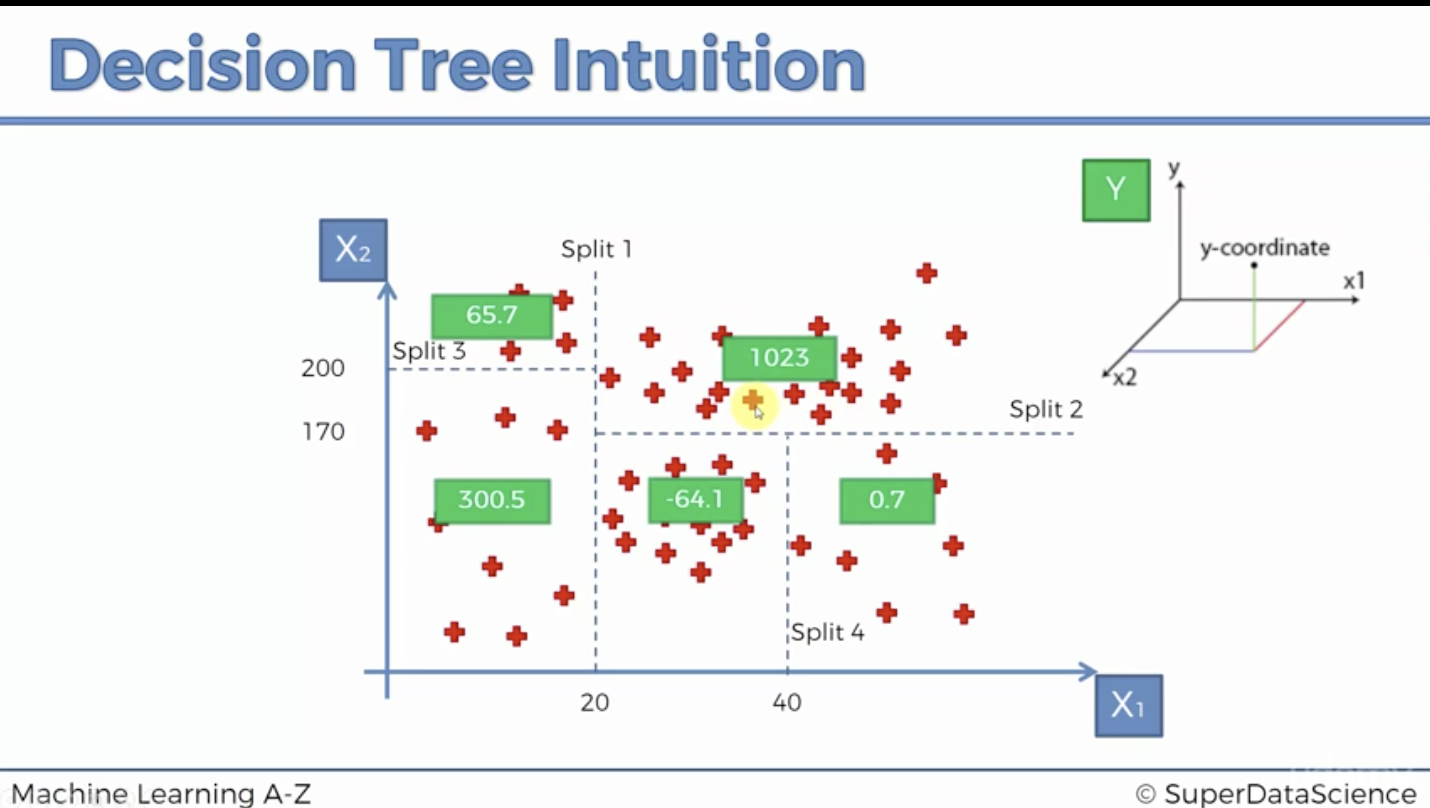

In [7]:
from IPython.display import Image

#Downloaded/local file:
Image(filename = "/Users/gaylonalfano/documents/Python/Machine Learning A-Z/Part 2 - Regression/Section 8 - Decision Tree Regression/DecisionTree1.png")

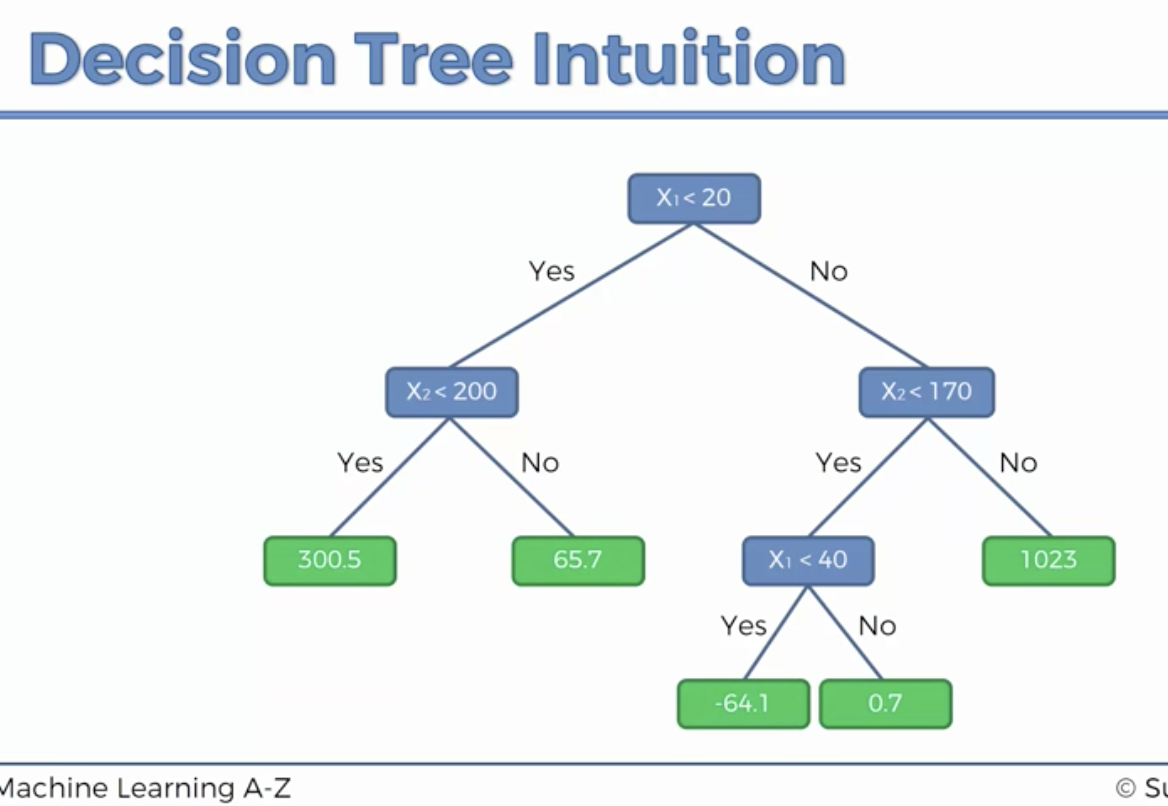

In [8]:
Image(filename = "/Users/gaylonalfano/documents/Python/Machine Learning A-Z/Part 2 - Regression/Section 8 - Decision Tree Regression/DecisionTree2.png")

## Decision Tree Regression Steps
Standard steps:
1. Import a class from a certain library
2. Create an object of this class which will be a decision tree regressor object
3. Use the .fit method on this regressor object to fit our regressor to our dataset. Then it will be ready.

In [10]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

os.getcwd()
os.chdir("/Users/gaylonalfano/Documents/Python/Machine Learning A-Z/Part 2 - Regression/Section 8 - Decision Tree Regression")

In [11]:
# Importing the dataset
# Handy tip: X must be a DF/Matrix, not a Series/Vector
# Therefore use .iloc[:, 1:2] instead of [:, 1]
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [15]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [16]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [12]:
# Splitting the dataset ino the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling -- NOT needed this time
# Polynomial regression just consists of adding PNR terms
# into the MLR equation, so we will use the same LinearRegression
# library that we used for SLR and MLR, which is the library
# that does feature scaling itself, so not needed.
# Ready to move on to the next step.
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler() \nX_train = sc_X.fit_transform(X_train) \nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [17]:
# Fitting the Decision Tree Regression model to the dataset
# This template is for non-linear regression models
# Therefore, will not create a LR object.
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion = 'mse', random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [18]:
# Predicting the Decision Tree Regression results. Got rid of the LR objects (lin_reg, poly_reg, etc.)
# First run w/o feature scaling y_pred = 150k
y_pred = regressor.predict(6.5) # Level of hire was 6.5

In [19]:
y_pred

array([150000.])

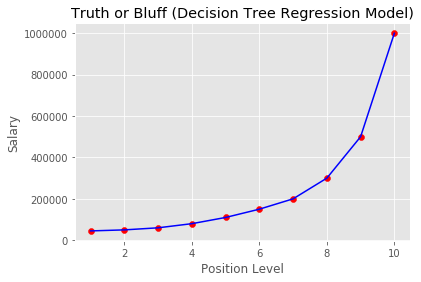

In [20]:
# Visualizing the Decision Tree Regression model results
# This is a TRAP! It's taking the average of each interval. It should
# be an average constant. The problem is in our regression template!
# It's only plotting the 10 salaries on the 10 levels/increments.
# This is a non-continuous regression model.
plt.style.use(style = 'ggplot')
plt.scatter(x = X, y = y, color = 'red') 
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title("Truth or Bluff (Decision Tree Regression Model)") 
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

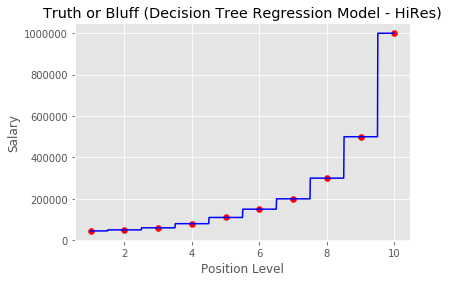

In [22]:
# Visualizing the Decision Tree Regression model results (higher resolution/smoother curve)
# Since this is a non-continuous model, technically should have true vertical
# lines (steps/ladder), therefore need to make the resolution even higher
# by incrementing by an even smaller amount.

# Based on the entropy in the information gained, it splits the whole range
# of independent variable into different intervals. It takes the avg within
# each interval. In this case, we only have a few data points. 
X_grid = np.arange(min(X), max(X), step = 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.style.use(style = 'ggplot')
plt.scatter(x = X, y = y, color = 'red') 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title("Truth or Bluff (Decision Tree Regression Model - HiRes)") 
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()